In [15]:
index_exp = 2

In [16]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [18]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [19]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Finish reading Experiment!


In [20]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Simon_SEILiP_h") # for Linux

workbook = openpyxl.Workbook() 
sheet = workbook.active  
excel_name = f"Summary of Simon_SEILiP_h"
sheet_title = "Summary" 
sheet.title = sheet_title
workbook.save(BasicPath+f"/{excel_name}.xlsx" )

In [23]:
# Reload all scans  
Big_start = 1; Big_end = 600; case_no=10;
purpose_i = "Simon_SEILiP_h"

Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()

# check whether all cases succeed, if so, it should contains a png file start with 0_Scan
def Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i):
    # List all files in the folder 
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    target_folder = BasicPath + Target
    #print(target_folder)
    files = os.listdir(target_folder)
    # Check if any file matches the criteria
    Flag_all_succeed = False
    for file_name in files:
        if file_name.endswith('.png') and '0_Scan' in file_name:
            Flag_all_succeed = True
            break
    if Flag_all_succeed:
        print(f"All cases succeed from {Scan_start} to {Scan_end}")
    else:
        print(f"Some cases failed from {Scan_start} to {Scan_end}")
    return Flag_all_succeed

def Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,dpi,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath +Target 
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(Num_subplot,1, figsize=(6,13),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[3].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[4].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel("LLI %")
    axs[2].set_ylabel("LAM NE %")
    axs[3].set_ylabel("LAM PE %")
    axs[4].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[4].set_xlabel("Charge Throughput (kA.h)")
    for i in range(0,Num_subplot):
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[4].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    #axs[0].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    #axs[1].legend(prop={'family':'DejaVu Sans','size':fs-10},loc='best',frameon=False)
    fig.suptitle(
        f"0_Scan {index_list[0]}-{index_list[-1]}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + Target +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

def Collect_1case_Excel(Scan_start,Scan_end,purpose_i):
    Indexs =np.arange(Scan_start-1,Scan_end)
    Index_List_succeed = Indexs+1
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    sheet_name_xlsx = 'Output';
    for k,index_i in enumerate(Index_List_succeed):
        #print(index_i)
        try:
            old_book = str(index_i) + '_' + book_name_xlsx
            #print(old_book)
            #open excel:
            data_old = openpyxl.load_workbook(
                BasicPath + Target +   "Excel/" + old_book)   
            data_tar = openpyxl.load_workbook(
                BasicPath + Target+   book_name_xlsx) 

            table_old = data_old[str(index_i)]
            nrows_old = table_old.max_row  # 获得行数
            ncolumns_old = table_old.max_column  # 获得列数

            table_tar = data_tar[sheet_name_xlsx]
            nrows_tar = table_tar.max_row # ncolumns_old + k +1 # Mark!!! Most important changes!
            ncolumns_old = table_old.max_column  # 获得列数
            list_old = [];
            #print(nrows_old,nrows_tar)
            for i in range(1,nrows_old+1):
                for j in range(1,ncolumns_old+1):
                    list_old.append(table_old.cell(row=i,column=j).value)
            
            list_old = [list_old,]
            for i in range(1, len(list_old)+1):
                    for j in range(1, len(list_old[i-1])+1):
                        #print(i,j,list_old[i-1][j-1]    )
                        table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
            data_tar.save(
                BasicPath + Target
                + book_name_xlsx) 
            data_tar.close()
        except:
            print(f"Something goes wrong for Scan {index_i}!")
        else:
            print(f"Successfuly write results for Scan {index_i}!") 
    return

# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i):
    # Open the source workbook
    #    purpose = "Latin_6para_200cases_narrow"
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath +Target
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"/{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"/{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Flag_all_succeed = Check_all_succeed(Scan_start,Scan_end,BasicPath,purpose_i)
    if Flag_all_succeed:
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)
    else:
        # first, plot summary
        Plot_summary(Scan_start,Scan_end,Exp_Any_AllData,100,purpose_i)
        # then collect single cases into a summary of the 10 cases
        Collect_1case_Excel(Scan_start,Scan_end,purpose_i)
        # finally, collect the 10 cases into a bigger file
        Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

All cases succeed from 1 to 10
Successfully collect Case_1_10
All cases succeed from 11 to 20
Successfully collect Case_11_20
All cases succeed from 21 to 30
Successfully collect Case_21_30
All cases succeed from 31 to 40
Successfully collect Case_31_40
All cases succeed from 41 to 50
Successfully collect Case_41_50
All cases succeed from 51 to 60
Successfully collect Case_51_60
All cases succeed from 61 to 70
Successfully collect Case_61_70
All cases succeed from 71 to 80
Successfully collect Case_71_80
All cases succeed from 81 to 90
Successfully collect Case_81_90
All cases succeed from 91 to 100
Successfully collect Case_91_100
All cases succeed from 101 to 110
Successfully collect Case_101_110
All cases succeed from 111 to 120
Successfully collect Case_111_120
All cases succeed from 121 to 130
Successfully collect Case_121_130
All cases succeed from 131 to 140
Successfully collect Case_131_140
All cases succeed from 141 to 150
Successfully collect Case_141_150
All cases succeed fr

In [15]:
# collect all results:
# save all results into the summary file
def Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i):
    # Open the source workbook
    #    purpose = "Latin_6para_200cases_narrow"
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    book_name_xlsx =  f'Summary_{purpose}.xlsx'
    source_workbook = openpyxl.load_workbook(
        filename=BasicPath +Target
        + book_name_xlsx)
    # Open the target workbook
    target_workbook = openpyxl.load_workbook(
        BasicPath+f"/{excel_name}.xlsx" )
    # Get the active sheet of the source workbook
    source_sheet = source_workbook.active
    # Get the target sheet by name
    target_sheet = target_workbook[sheet_title]

    # Copy the values and formatting from the source sheet to the target sheet
    if Scan_start==1:
        for row in source_sheet.iter_rows(values_only=True):
            target_sheet.append(row)
    else:
        for row in source_sheet.iter_rows(values_only=True):
            if row != next(source_sheet.iter_rows(values_only=True)):
                target_sheet.append(row)

    # Save the changes to the target workbook
    target_workbook.save(BasicPath+f"/{excel_name}.xlsx")
    print(f"Successfully collect Case_{Scan_start}_{Scan_end}")
    return 
# collect all results:
for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Collect_multicases_excel(Scan_start,Scan_end,BasicPath,excel_name,sheet_title,purpose_i)

Successfully collect Case_1_10
Successfully collect Case_11_20
Successfully collect Case_21_30


In [20]:
# tidy up the 1000 cases - delete the rows with "Unknown" - should upgrade in the future to keep 
""" from openpyxl import load_workbook
workbook = load_workbook(filename=BasicPath+f"{excel_name}.xlsx")
sheet = workbook.active
# Convert rows to a list and iterate over it in reverse order
rows = list(sheet.iter_rows(values_only=True))
for row in reversed(range(len(rows))):
    if "Unknown" in rows[row]:
        sheet.delete_rows(row + 1)  # Delete the row
workbook.save(filename=BasicPath+f"{excel_name}.xlsx") """

In [24]:
# replot everything:
if not os.path.exists(BasicPath + "/Plots_collect"):
   os.mkdir(BasicPath + "/Plots_collect");
if not os.path.exists(BasicPath + "/Plots_collect/Allscans"):
   os.mkdir(BasicPath + "/Plots_collect/Allscans");

# cre
def Plot_summary2(Scan_start,Scan_end,dpi):
    Indexs =np.arange(Scan_start-1,Scan_end)
    index_list = Indexs+1
    All_Scans = {}
    Target  = f'/{purpose_i}_Case_{Scan_start}_{Scan_end}/'  
    for scan in index_list:
        All_Scans[str(scan)]={}
        try:
            All_Scans[str(scan)] = loadmat( 
            BasicPath + Target
            +  "Mats/" + str(scan)+ "-Ageing_summary_only.mat")
        except:
            print(f"Nothing in Scan {scan}")
    # plot
    Num_subplot = 5;
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True)
    cm = mpl.cm.get_cmap("cool", len(index_list))  
    for i,scan in enumerate(index_list):
        try:
            axs[0,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]['CDend SOH [%]'][0],     
                '-o',color=cm(i), label="Scan=" + str(scan) ) # 
            axs[0,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'][0], 
                All_Scans[str(scan)]["CDend LLI [%]"][0],'-o',color=cm(i), )
            axs[0,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_ne [%]"][0],'-o',   color=cm(i),   ) 
            axs[1,0].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                All_Scans[str(scan)]["CDend LAM_pe [%]"][0],    '-o', color=cm(i),  ) 
            axs[1,1].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][0], 
                np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"][0]),   '-o', color=cm(i), )
            axs[1,2].plot(
                All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
                np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),   '-o', color=cm(i), )
        except:
            pass
        else:
            pass 
    # Plot Charge Throughput (A.h) vs SOH
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    fig.suptitle(
        f"Scan {index_list[0]}-{index_list[-1]}"
        +"Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath + f"/Plots_collect/Allscans/" +  
        f"0_Scan {index_list[0]}-{index_list[-1]} Summary.png", dpi=dpi)
    plt.close() 
    return

for Scan_start,Scan_end in zip(Scan_start_all,Scan_end_all):
    Plot_summary2(Scan_start,Scan_end,dpi=300)
    

/tmp/ipykernel_11138/2528704776.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", len(index_list))


Nothing in Scan 20
Nothing in Scan 34
Nothing in Scan 36
Nothing in Scan 40
Nothing in Scan 56
Nothing in Scan 92
Nothing in Scan 93
Nothing in Scan 94
Nothing in Scan 95
Nothing in Scan 97
Nothing in Scan 98
Nothing in Scan 99
Nothing in Scan 100
Nothing in Scan 183
Nothing in Scan 186
Nothing in Scan 187
Nothing in Scan 193
Nothing in Scan 195
Nothing in Scan 196
Nothing in Scan 198
Nothing in Scan 306
Nothing in Scan 307
Nothing in Scan 344
Nothing in Scan 374
Nothing in Scan 376
Nothing in Scan 378
Nothing in Scan 379
Nothing in Scan 411
Nothing in Scan 412
Nothing in Scan 413
Nothing in Scan 414
Nothing in Scan 415
Nothing in Scan 416
Nothing in Scan 417
Nothing in Scan 418
Nothing in Scan 419
Nothing in Scan 420


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 421
Nothing in Scan 422
Nothing in Scan 423
Nothing in Scan 424
Nothing in Scan 425
Nothing in Scan 426
Nothing in Scan 427
Nothing in Scan 428
Nothing in Scan 429
Nothing in Scan 430
Nothing in Scan 444
Nothing in Scan 445
Nothing in Scan 448
Nothing in Scan 449
Nothing in Scan 450
Nothing in Scan 453
Nothing in Scan 455
Nothing in Scan 456
Nothing in Scan 457
Nothing in Scan 459
Nothing in Scan 460
Nothing in Scan 463
Nothing in Scan 469
Nothing in Scan 470
Nothing in Scan 483
Nothing in Scan 487
Nothing in Scan 488
Nothing in Scan 489
Nothing in Scan 492
Nothing in Scan 495
Nothing in Scan 497
Nothing in Scan 498
Nothing in Scan 507
Nothing in Scan 512
Nothing in Scan 516
Nothing in Scan 518
Nothing in Scan 527


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nothing in Scan 531
Nothing in Scan 532
Nothing in Scan 533
Nothing in Scan 534
Nothing in Scan 535
Nothing in Scan 536
Nothing in Scan 537
Nothing in Scan 538
Nothing in Scan 539
Nothing in Scan 540
Nothing in Scan 549
Nothing in Scan 562
Nothing in Scan 565
Nothing in Scan 567
Nothing in Scan 569
Nothing in Scan 572
Nothing in Scan 576
Nothing in Scan 580
Nothing in Scan 582
Nothing in Scan 584
Nothing in Scan 585
Nothing in Scan 587
Nothing in Scan 588
Nothing in Scan 590
Nothing in Scan 592
Nothing in Scan 593
Nothing in Scan 594
Nothing in Scan 595
Nothing in Scan 596
Nothing in Scan 597
Nothing in Scan 598
Nothing in Scan 599


In [35]:
# Post-processing - using ML knowledge
# Read the Excel file into a DataFrame
result_df = pd.read_excel(BasicPath+"/Summary of Simon_SEILiP_h.xlsx")
result_df["SEI growth activation energy [J.mol-1]"]
result_df = result_df.drop_duplicates(subset='Scan No', keep='last')
result_df.to_excel(BasicPath+"/Summary of Simon_SEILiP_h.xlsx", index=False)


In [29]:
column_mapping = {
    "SEI growth activation energy [J.mol-1]":"Eact",
    "Ageing temperature":"T",
}
# Rename the columns using the mapping   - Error_1~6;   Para_1~8
result_df = result_df.rename(columns=column_mapping)

In [43]:
ranked_rows = result_df.sort_values(by='Error Tot%')
ranked_rows = ranked_rows[ranked_rows['Error Tot%'] < 5]
selected_short = ranked_rows[["Scan No","Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap Loss","LLI to LiP","LLI to SEI","LAM to Neg","LAM to Pos",
    "Width Final"]]
column_mapping = {
    "Ageing temperature":"T",  
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
}
selected_short = selected_short.rename(
    columns=column_mapping)
selected_short.to_excel(BasicPath+'/selected_rows2.xlsx', index=False)

In [38]:
selected_rows = pd.DataFrame()
for i in range(1, 200):
    selected_row_i = pd.DataFrame()
    if (i in result_df['Scan No'].values) and ((200 + i) in result_df['Scan No'].values) and ((400 + i) in result_df['Scan No'].values):
        selected_row_i = result_df[result_df['Scan No'].isin([i, 200 + i, 400 + i])]
        selected_rows = pd.concat([selected_rows, selected_row_i])
        #print(i)
selected_rows['Cap_loss/Punish'] = selected_rows['Cap Loss'] * selected_rows['Punish']
selected_short = selected_rows[["Scan No","Ageing temperature","Punish",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap_loss/Punish"]]
column_mapping = {
    "Ageing temperature":"T",
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
}
selected_short = selected_short.rename(
    columns=column_mapping)
print(selected_short)
selected_short.to_excel(BasicPath+'/selected_rows.xlsx', index=False)

     Scan No   T  Punish          Dint         Decay         k_LiP     V_sei   
0          1  10       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122  \
180      201  25       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122   
373      401  40       1  4.285335e-21  3.696913e-09  1.523824e-11  0.000122   
1          2  10       1  2.841765e-19  1.109752e-09  4.068245e-10  0.000138   
181      202  25       1  2.841765e-19  1.109752e-09  4.068245e-10  0.000138   
..       ...  ..     ...           ...           ...           ...       ...   
361      389  25       1  3.550322e-18  1.867914e-08  1.722623e-09  0.000085   
491      589  40       1  3.550322e-18  1.867914e-08  1.722623e-09  0.000085   
174      191  10       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   
363      391  25       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   
492      591  40       1  4.668318e-21  2.736440e-07  1.489038e-13  0.000109   

         Eact_SEI  Cap_loss/Punish  
0 

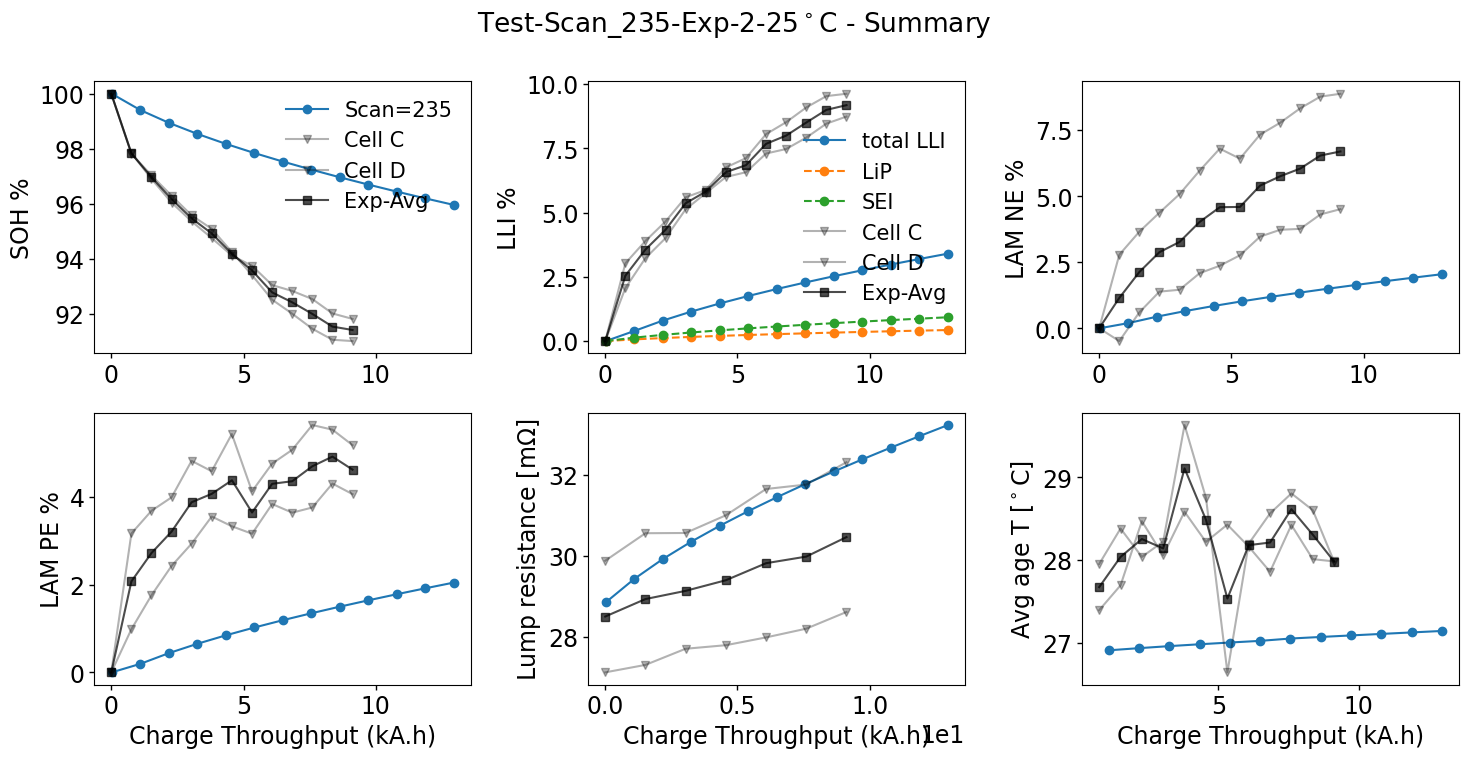

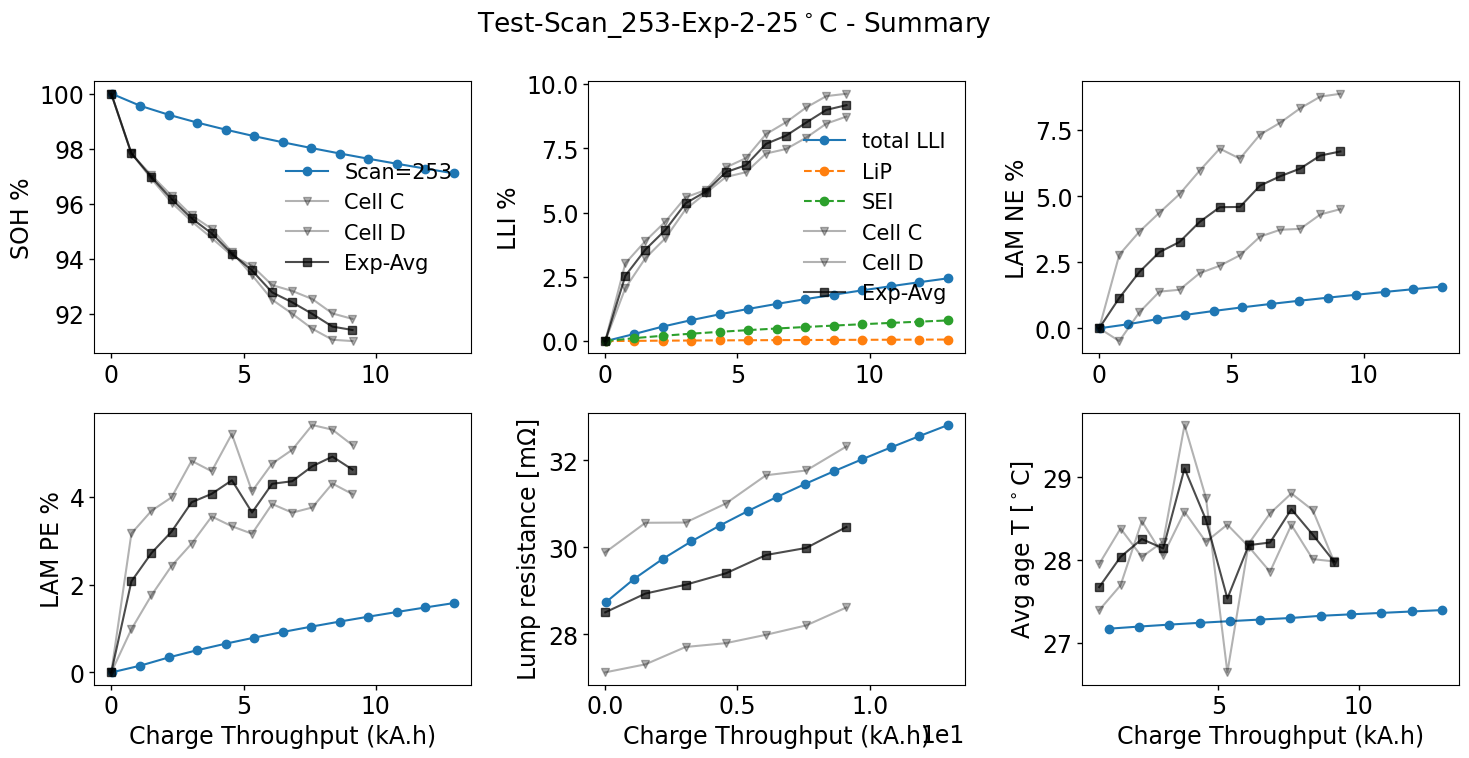

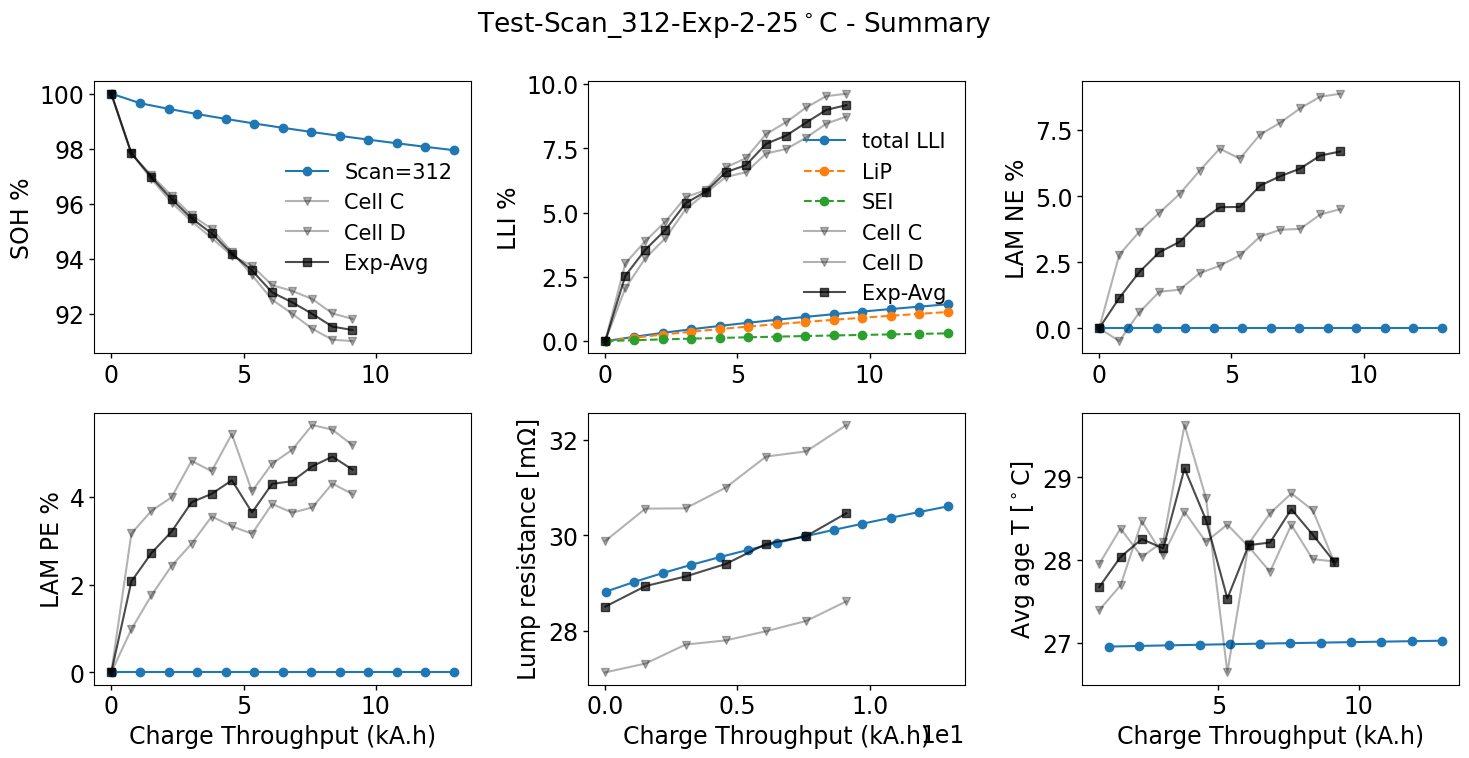

In [41]:
#
import json

# plot inside the function:
def Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi):

    All_Scans = {}
    selected_rows = result_df[result_df['Scan No']==Selected]
    index_exp = selected_rows["Exp No."]
    index_exp = int(index_exp.iloc[0])
    Temp = selected_rows['Ageing temperature']
    Temp = float(Temp.iloc[0])
    scan = Selected
    Scan_start = ((scan - 1) // 10) * 10 + 1
    Scan_end = Scan_start + 9 
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    Target  = f'/{purpose}/'
    model_options = selected_rows['Model option']
    model_options = str(model_options.iloc[0])
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True) 
    #try:
    with open( 
        BasicPath +  Target +  "Mats/" + str(scan)
        + "-StructData.json") as file:
        All_Scans[str(scan)] = json.load(file)
    axs[0,0].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]['CDend SOH [%]'],     
        '-o', label="Scan=" + str(scan) )
    axs[0,1].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]["CDend LLI [%]"],'-o', label="total LLI")
    if model_options.__contains__("lithium plating"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
    if model_options.__contains__("SEI"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
    if model_options.__contains__("SEI on cracks"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
    axs[0,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
    axs[1,0].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
    axs[1,1].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
    axs[1,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
        np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', ) 
    #except:
    #    print("Load .mat fail")
    #else:
    #    pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temp))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0,0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[0,1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[0,2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[1,0].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[1,1].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
        axs[1,2].plot(
            chThr_temp[1:],
            np.array(df["Age set average temperature (degC)"][1:]).astype(float),
            color=color_exp,marker=marker_exp,)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    
    axs[0,0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[0,1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[0,2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[1,0].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[1,1].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[1,2].plot(
        X_1_st[1:],Y_6_st_avg[1:],
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    #print(index_exp)
    fig.suptitle(
        f"{Str_1}-Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-0_Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}degC Summary.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return

Selected = 235; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 253; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 312; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)


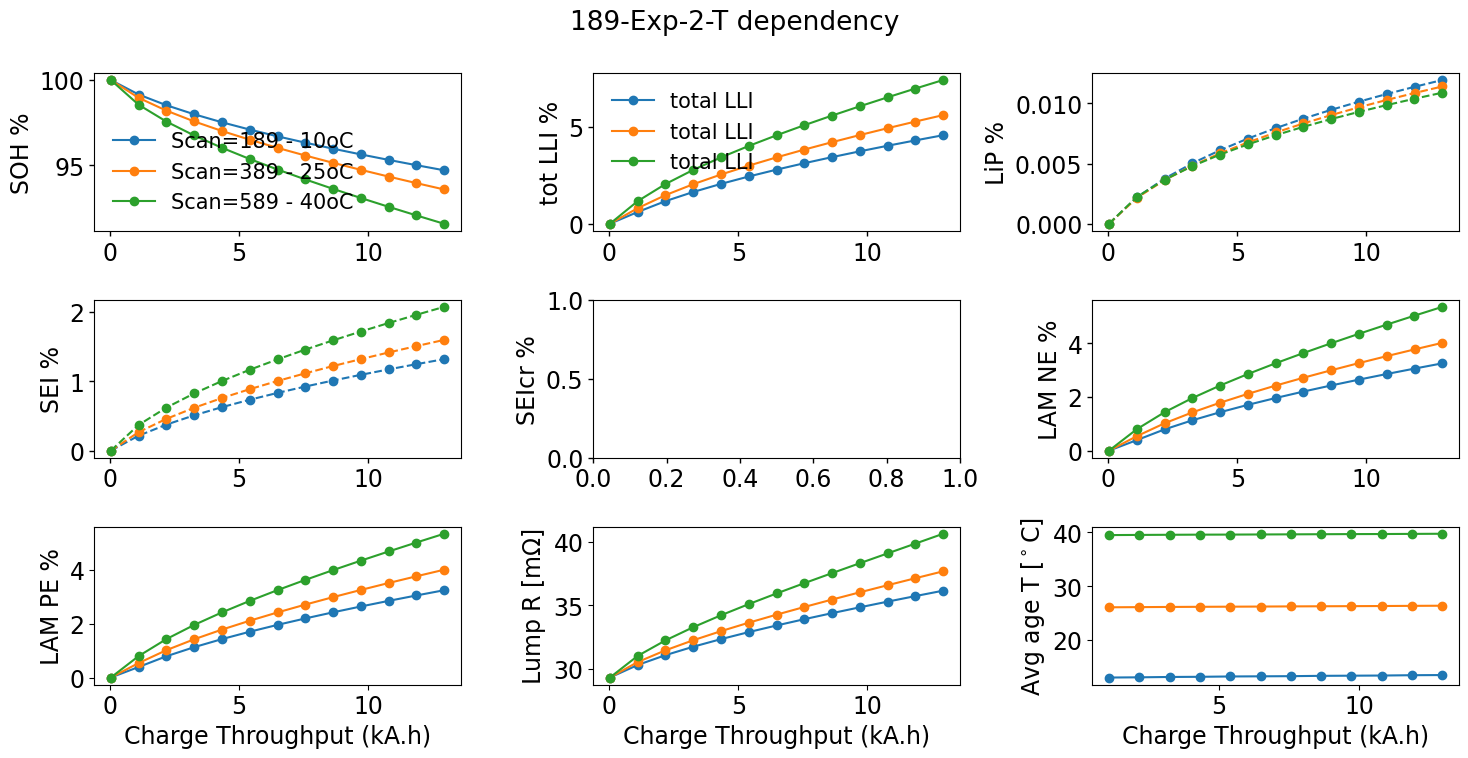

In [40]:
def Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,
    purpose_i,Str_1,BasicPath,fs,dpi):

    fig, axs = plt.subplots(3,3, figsize=(15,7.8),tight_layout=True) 
    def Plot_one_scan(result_df,Selected,purpose_i):
        All_Scans = {}
        selected_rows = result_df[result_df['Scan No']==Selected]
        index_exp = selected_rows["Exp No."]
        index_exp = int(index_exp.iloc[0])
        Temp = selected_rows['Ageing temperature']
        Temp = float(Temp.iloc[0])
        scan = Selected
        Scan_start = ((scan - 1) // 10) * 10 + 1
        Scan_end = Scan_start + 9 
        purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
        Target  = f'/{purpose}/'
        model_options = selected_rows['Model option']
        model_options = str(model_options.iloc[0])
        #try:
        with open( 
            BasicPath +  Target +  "Mats/" + str(scan)
            + "-StructData.json") as file:
            All_Scans[str(scan)] = json.load(file)
        axs[0,0].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]['CDend SOH [%]'],     
            '-o', label=f"Scan={str(scan)} - {str(int(Temp))}oC")
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI [%]"],'-o', label="total LLI")
        if model_options.__contains__("lithium plating"):
            axs[0,2].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
        if model_options.__contains__("SEI"):
            axs[1,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
        if model_options.__contains__("SEI on cracks"):
            axs[1,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
        axs[1,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
        axs[2,0].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
        axs[2,1].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
        axs[2,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
            np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', )
        return  
    #except:
    for Selected in Selected_all:
        Plot_one_scan(result_df,Selected,purpose_i)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("tot LLI %")
    axs[0,2].set_ylabel("LiP %")
    axs[1,0].set_ylabel("SEI %")
    axs[1,1].set_ylabel("SEIcr %")
    axs[1,2].set_ylabel("LAM NE %")
    axs[2,0].set_ylabel("LAM PE %")
    axs[2,1].set_ylabel(r"Lump R [m$\Omega$]")
    axs[2,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[2,0].set_xlabel("Charge Throughput (kA.h)")
    axs[2,1].set_xlabel("Charge Throughput (kA.h)")
    axs[2,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    #print(index_exp)
    fig.suptitle(
        f"{Str_1}-Exp-{index_exp}-T dependency", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-Exp-{index_exp}-T dependency.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return
selected  = 189
Selected_all = [selected,selected+200,selected+400]; Str_1 = f"{Selected_all[0]}"
Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,
    purpose_i,Str_1,BasicPath,fs,dpi)